Shape: (100, 6)
Columns: Index(['x', 'y_noise_1', 'y_noise_2', 'y_noise_3', 'y_noise_4', 'y_noise_5'], dtype='object')

First five rows:


,x,y_noise_1,y_noise_2,y_noise_3,y_noise_4,y_noise_5
0,-1.000000,11.624419,8.296963,12.201067,7.811725,3.155566
1,-0.929293,10.377466,9.674440,12.198084,8.275006,7.518855
2,-0.858586,10.585100,9.251983,13.186565,12.926586,9.963630
3,-0.787879,10.913928,7.786344,12.552304,11.832379,9.625801
4,-0.717172,8.640287,8.551869,4.741432,8.790834,6.624113



Last five rows:


,x,y_noise_1,y_noise_2,y_noise_3,y_noise_4,y_noise_5
95,5.717172,-1.411918,0.822231,-2.027132,-1.825106,2.746147
96,5.787879,0.344879,-1.718956,2.747559,-6.803779,-5.137472
97,5.858586,0.307133,0.353528,0.967976,5.461567,-0.905616
98,5.929293,0.048657,0.159961,2.482130,-0.414616,-4.334548
99,6.000000,-0.193438,-2.244792,1.930035,4.992414,-6.872850


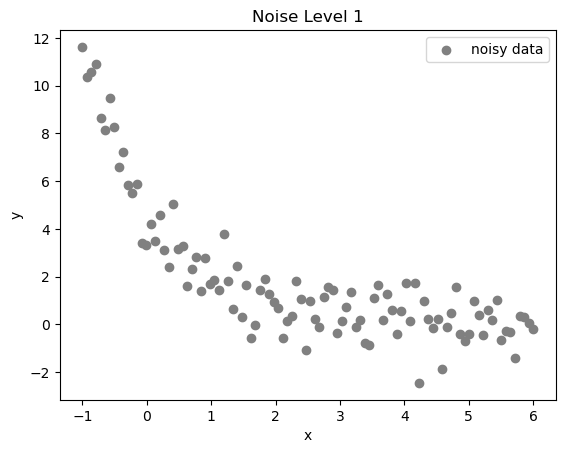

Fit: y = 4.71 * e^(-0.92 * x)
Reduced chi-squared: 0.79


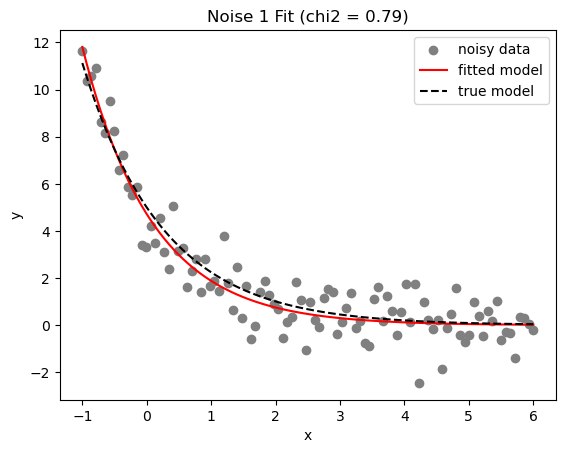

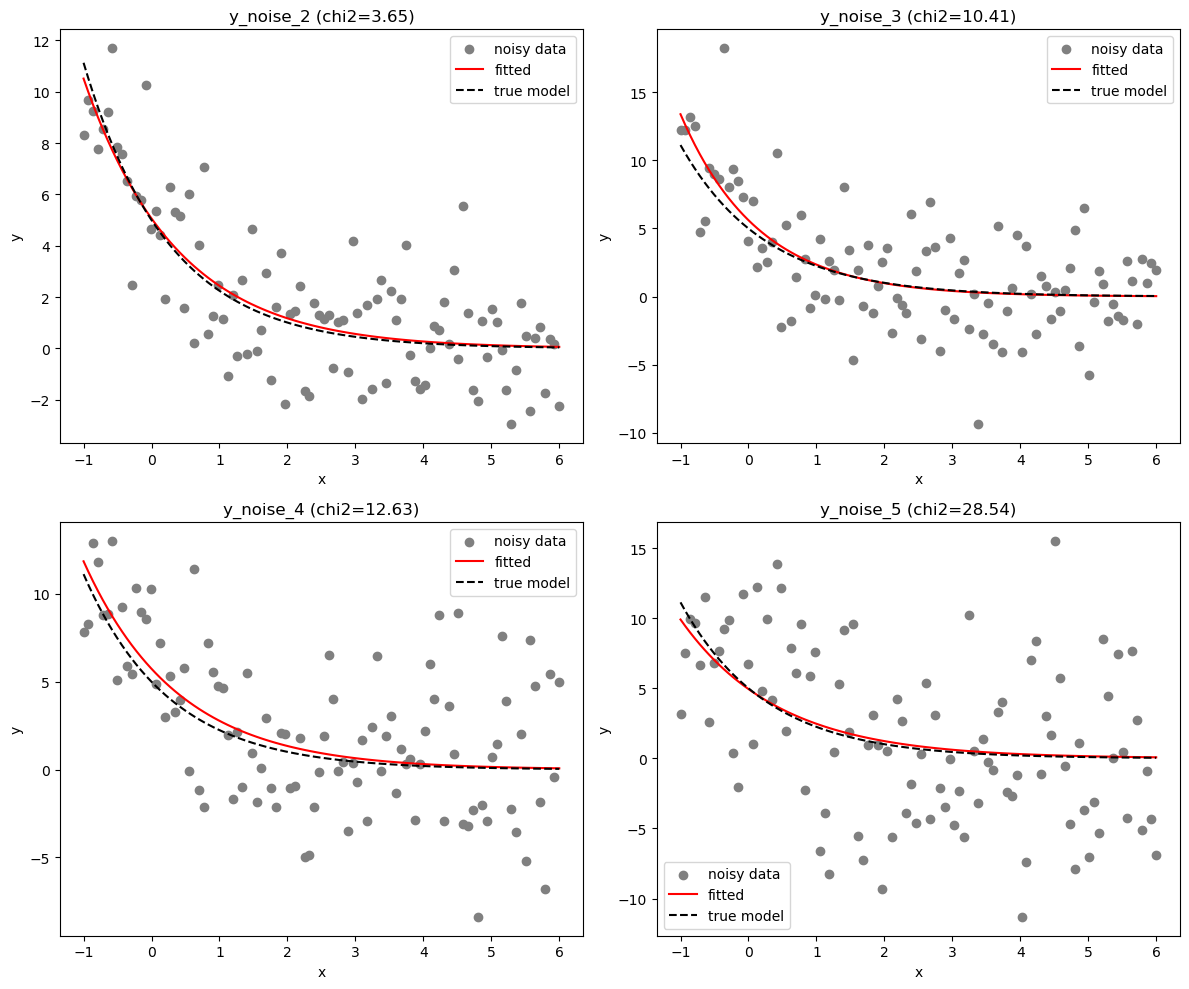

,noise_level,A_fit,k_fit,chi_squared
0,y_noise_1,4.714814,0.918308,0.790673
1,y_noise_2,5.063889,0.730396,3.649382
2,y_noise_3,5.609396,0.870372,10.410207
3,y_noise_4,5.738727,0.725965,12.626832
4,y_noise_5,4.943458,0.695012,28.538124


In [2]:
# # Homework 9 - Curve Fitting (SciPy)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the CSV
df = pd.read_csv("noisy_curvefit_data.csv")

df

# ## Inspecting the Data

print("Shape:", df.shape)
print("Columns:", df.columns)

print("\nFirst five rows:")
display(df.head())

print("\nLast five rows:")
display(df.tail())

# ## Plot x vs y_noise_1

x = df["x"]
y_noise_1 = df["y_noise_1"]

plt.scatter(x, y_noise_1, label="noisy data", color="gray")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Noise Level 1")
plt.legend()
plt.show()

# ## Define Model

def model(x, A, k):
    return A * np.exp(-k * x)

# ## Fit the Data

p0 = [1, 1]
popt, pcov = curve_fit(model, x, y_noise_1, p0=p0)
A_fit, k_fit = popt

print(f"Fit: y = {A_fit:.2f} * e^(-{k_fit:.2f} * x)")

# ## Reduced Chi-Squared

residuals = y_noise_1 - model(x, A_fit, k_fit)
chi2 = np.sum(residuals**2)
dof = len(x) - len(popt)
chi2_reduced = chi2 / dof

print("Reduced chi-squared:", round(chi2_reduced, 2))

# ## Plot Fit + True Model

plt.scatter(x, y_noise_1, color="gray", label="noisy data")

plt.plot(x, model(x, A_fit, k_fit), color="red", label="fitted model")
plt.plot(x, model(x, 5, 0.8), "--", color="black", label="true model")

plt.title(f"Noise 1 Fit (chi2 = {chi2_reduced:.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# ## Fit Function for Looping Noise Levels

def fit_model(x, y):
    p0 = [1, 1]
    popt, pcov = curve_fit(model, x, y, p0=p0)
    A_fit, k_fit = popt
    residuals = y - model(x, A_fit, k_fit)
    chi2 = np.sum(residuals**2)
    dof = len(x) - len(popt)
    return A_fit, k_fit, chi2 / dof

# ## Subplot Comparison

noise_cols = ["y_noise_2", "y_noise_3", "y_noise_4", "y_noise_5"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(noise_cols):
    y = df[col]
    A_fit, k_fit, chi = fit_model(x, y)
    
    ax = axes[i]
    ax.scatter(x, y, color="gray", label="noisy data")
    ax.plot(x, model(x, A_fit, k_fit), color="red", label="fitted")
    ax.plot(x, model(x, 5, 0.8), "--", color="black", label="true model")
    
    ax.set_title(f"{col} (chi2={chi:.2f})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()

plt.tight_layout()
plt.show()

# ## Saving Results Table

results = []

# include y_noise_1
noise_levels = ["y_noise_1"] + noise_cols

for col in noise_levels:
    y = df[col]
    A_fit, k_fit, chi = fit_model(x, y)
    results.append([col, A_fit, k_fit, chi])

results_df = pd.DataFrame(results, columns=["noise_level", "A_fit", "k_fit", "chi_squared"])

results_df.to_csv("noisy_parameters.csv", index=False)

results_df
